Goal of this notebook is to generate visualizations that will help portray our statistical findings while also being easy to read and ascetic.

Step 1. Dig through the data and find statistically significant and interesting correlations - the messier of the EDA steps.

In [1]:
#Importing EDA type modules
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing clean_df
df = pd.read_csv('Peruvian_Bank_Data/clean_df.csv', header = 0)
df.head()

,age,job,marital,education,in_default,avg_yearly_balance,housing_loan,personal_loan,contact_method,day,month,duration,campaign_contacts,prev_days,previous_contacts,prev_outcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no


In [3]:
#let's start with age
print('Avg age of no : {} \nAvg age of yes: {}'.format(df.age.loc[df.term_deposit == 'no'].mean(), df.age.loc[df.term_deposit == 'yes'].mean()))

Avg age of no : 40.85346751058695 
Avg age of yes: 41.743717728055074


In [4]:
#order of jobs for both
#yes split
df.loc[df.term_deposit == 'yes'].set_index('job').groupby('job').count()['term_deposit'].sort_values(ascending = False)

job
management       1432
technician        923
blue-collar       777
admin.            689
retired           570
services          407
student           288
unemployed        215
self-employed     207
entrepreneur      138
housemaid         123
unknown            41
Name: term_deposit, dtype: int64

In [5]:
df.loc[df.term_deposit == 'no'].set_index('job').groupby('job').count()['term_deposit'].sort_values(ascending = False)

job
blue-collar      9901
management       8995
technician       7442
admin.           4960
services         4164
retired          1924
self-employed    1555
entrepreneur     1517
housemaid        1229
unemployed       1216
student           734
unknown           285
Name: term_deposit, dtype: int64

In [6]:
#This gives me an idea of creating a dictionary of some percentages represented as float
jobs_total = {}
for idx, val in df.job.value_counts().items():
    jobs_total[idx] = val
jobs_yes = {}
for idx, val in df.job.loc[df.term_deposit == 'yes'].value_counts().items():
    jobs_yes[idx] = val
jobs_no = {}
for idx, val in df.job.loc[df.term_deposit == 'no'].value_counts().items():
    jobs_no[idx] = val

jobs_no_perc = {}
jobs_yes_perc = {}
for key in jobs_total:
    jobs_no_perc[key] = round(jobs_no[key]/jobs_total[key], 4)
    jobs_yes_perc[key] = round(jobs_yes[key]/jobs_total[key], 4)

print(jobs_no_perc)

print(jobs_yes_perc)

{'blue-collar': 0.9272, 'management': 0.8627, 'technician': 0.8897, 'admin.': 0.878, 'services': 0.911, 'retired': 0.7715, 'self-employed': 0.8825, 'entrepreneur': 0.9166, 'unemployed': 0.8498, 'housemaid': 0.909, 'student': 0.7182, 'unknown': 0.8742}
{'blue-collar': 0.0728, 'management': 0.1373, 'technician': 0.1103, 'admin.': 0.122, 'services': 0.089, 'retired': 0.2285, 'self-employed': 0.1175, 'entrepreneur': 0.0834, 'unemployed': 0.1502, 'housemaid': 0.091, 'student': 0.2818, 'unknown': 0.1258}


Too early to make any real conclusions here, although we do see that a surprisingly high amount of students signed up for term deposits.

In [7]:
#let's take a look at marital data

print('Total marital data:\n{}\n'.format(df.marital.value_counts()))
print('Yes marital data: \n{}\n'.format(df.marital.loc[df.term_deposit =='yes'].value_counts()))
print('No marital data: \n{}\n'.format(df.marital.loc[df.term_deposit =='no'].value_counts()))

Total marital data:
married     30011
single      13986
divorced     5735
Name: marital, dtype: int64

Yes marital data: 
married     3032
single      2079
divorced     699
Name: marital, dtype: int64

No marital data: 
married     26979
single      11907
divorced     5036
Name: marital, dtype: int64



Just from eyeballing the data here, we see that a higher ratio of single people have subscribed to a term_deposit versus married partners. However, this may also be because only one partner decides to do the term deposit using a combination of their money. So I can't write this off as leaning any which way because I don't have individual data. We can go ahead and create ratios again however for exploration.

In [8]:
mar_total = {}
for idx, val in df.marital.value_counts().items():
    mar_total[idx] = val
mar_yes = {}
for idx, val in df.marital.loc[df.term_deposit == 'yes'].value_counts().items():
    mar_yes[idx] = val
mar_no = {}
for idx, val in df.marital.loc[df.term_deposit == 'no'].value_counts().items():
    mar_no[idx] = val

mar_no_perc = {}
mar_yes_perc = {}
for key in mar_total:
    mar_no_perc[key] = round(mar_no[key]/mar_total[key], 4)
    mar_yes_perc[key] = round(mar_yes[key]/mar_total[key], 4)

print("Marital status, No: {}\n".format(mar_no_perc))

print("Marital status, Yes: {}\n".format(mar_yes_perc))

Marital status, No: {'married': 0.899, 'single': 0.8514, 'divorced': 0.8781}

Marital status, Yes: {'married': 0.101, 'single': 0.1486, 'divorced': 0.1219}



In [9]:
#same exact thing, but education now. We've seem to found a groove.

print('Total educational data:\n{}\n'.format(df.education.value_counts()))
print('Yes educational data: \n{}\n'.format(df.education.loc[df.term_deposit =='yes'].value_counts()))
print('No educational data: \n{}\n'.format(df.education.loc[df.term_deposit =='no'].value_counts()))

edu_total = {}
for idx, val in df.education.value_counts().items():
    edu_total[idx] = val
edu_yes = {}
for idx, val in df.education.loc[df.term_deposit == 'yes'].value_counts().items():
    edu_yes[idx] = val
edu_no = {}
for idx, val in df.education.loc[df.term_deposit == 'no'].value_counts().items():
    edu_no[idx] = val

edu_no_perc = {}
edu_yes_perc = {}
for key in edu_total:
    edu_no_perc[key] = round(edu_no[key]/edu_total[key], 4)
    edu_yes_perc[key] = round(edu_yes[key]/edu_total[key], 4)

print("Educational status, No: {}\n".format(edu_no_perc))

print("Educational status, Yes: {}\n".format(edu_yes_perc))

Total educational data:
secondary    25508
tertiary     14651
primary       7529
unknown       2044
Name: education, dtype: int64

Yes educational data: 
secondary    2695
tertiary     2189
primary       655
unknown       271
Name: education, dtype: int64

No educational data: 
secondary    22813
tertiary     12462
primary       6874
unknown       1773
Name: education, dtype: int64

Educational status, No: {'secondary': 0.8943, 'tertiary': 0.8506, 'primary': 0.913, 'unknown': 0.8674}

Educational status, Yes: {'secondary': 0.1057, 'tertiary': 0.1494, 'primary': 0.087, 'unknown': 0.1326}



In [10]:
#I have a hunch about defaulting, but let's see what the data holds. 

print('Total default data:\n{}\n'.format(df.in_default.value_counts()))
print('Yes default data: \n{}\n'.format(df.in_default.loc[df.term_deposit =='yes'].value_counts()))
print('No default data: \n{}\n'.format(df.in_default.loc[df.term_deposit =='no'].value_counts()))

dft_total = {}
for idx, val in df.in_default.value_counts().items():
    dft_total[idx] = val
dft_yes = {}
for idx, val in df.in_default.loc[df.term_deposit == 'yes'].value_counts().items():
    dft_yes[idx] = val
dft_no = {}
for idx, val in df.in_default.loc[df.term_deposit == 'no'].value_counts().items():
    dft_no[idx] = val

dft_no_perc = {}
dft_yes_perc = {}
for key in dft_total:
    dft_no_perc[key] = round(dft_no[key]/dft_total[key], 4)
    dft_yes_perc[key] = round(dft_yes[key]/dft_total[key], 4)

print("In Default status, No: {}\n".format(dft_no_perc))

print("In Default status, Yes: {}\n".format(dft_yes_perc))

Total default data:
no     48841
yes      891
Name: in_default, dtype: int64

Yes default data: 
no     5749
yes      61
Name: in_default, dtype: int64

No default data: 
no     43092
yes      830
Name: in_default, dtype: int64

In Default status, No: {'no': 0.8823, 'yes': 0.9315}

In Default status, Yes: {'no': 0.1177, 'yes': 0.0685}



Pretty substantial difference. I forsee it being a strong feature for the model.

In [11]:
#avg_yearly_balance is next. This numerical data will be easier read by visuals, but let's get some basic info off it.
print('Avg_yearly_balance of no : {} \nAvg_yearly_balance of yes: {}'.format(df.avg_yearly_balance.loc[df.term_deposit == 'no'].mean(), \
                                                                             df.avg_yearly_balance.loc[df.term_deposit == 'yes'].mean()))
print('Min/Max no: {}/{}\nMin/Max yes:{}/{}'.format(df.avg_yearly_balance.loc[df.term_deposit == 'no'].min(), \
                                                    df.avg_yearly_balance.loc[df.term_deposit == 'no'].max(), \
                                                    df.avg_yearly_balance.loc[df.term_deposit == 'yes'].min(), \
                                                    df.avg_yearly_balance.loc[df.term_deposit == 'yes'].max()))
print('Total STD; {}\nNo STD: {}\nYes STD:{}'.format(df.avg_yearly_balance.std(), \
                                                     df.avg_yearly_balance.loc[df.term_deposit == 'no'].std(), \
                                                    df.avg_yearly_balance.loc[df.term_deposit == 'yes'].std()))

Avg_yearly_balance of no : 1312.7761941623787 
Avg_yearly_balance of yes: 1783.4358003442342
Min/Max no: -8019/102127
Min/Max yes:-3058/81204
Total STD; 3041.6087657666208
No STD: 2983.651008144628
Yes STD:3420.1800572166817


Hard to tell what's meaningful here. Clearly being a little negative hasn't stopped someone from signing up for a term deposit. Or at least being an average of negatives. The population of customers that have subscribed for a term_deposit also have the widest standard deviation. This must mean that avg balance has less to do with subscription than one would think. However, this could just be because less customers are in this group. 

In [12]:
#housing loan 

print('Total housing_loan data:\n{}\n'.format(df.housing_loan.value_counts()))
print('housing_loan with term_deposit: \n{}\n'.format(df.housing_loan.loc[df.term_deposit =='yes'].value_counts()))
print('housing_loan without term_deposit: \n{}\n'.format(df.housing_loan.loc[df.term_deposit =='no'].value_counts()))

hl_total = {}
for idx, val in df.housing_loan.value_counts().items():
    hl_total[idx] = val
hl_yes = {}
for idx, val in df.housing_loan.loc[df.term_deposit == 'yes'].value_counts().items():
    hl_yes[idx] = val
hl_no = {}
for idx, val in df.housing_loan.loc[df.term_deposit == 'no'].value_counts().items():
    hl_no[idx] = val

hl_no_perc = {}
hl_yes_perc = {}
for key in hl_total:
    hl_no_perc[key] = round(hl_no[key]/hl_total[key], 4)
    hl_yes_perc[key] = round(hl_yes[key]/hl_total[key], 4)

print("With housing_loan but did not subscribe to term_deposit: {}\n".format(hl_no_perc))

print("With housing_loan and subscribed to term_deposit: {}\n".format(hl_yes_perc))

Total housing_loan data:
yes    27689
no     22043
Name: housing_loan, dtype: int64

housing_loan with term_deposit: 
no     3655
yes    2155
Name: housing_loan, dtype: int64

housing_loan without term_deposit: 
yes    25534
no     18388
Name: housing_loan, dtype: int64

With housing_loan but did not subscribe to term_deposit: {'yes': 0.9222, 'no': 0.8342}

With housing_loan and subscribed to term_deposit: {'yes': 0.0778, 'no': 0.1658}



Great deal of people with housing loans did not go for the term_deposit. Let's see if this is similar with the personal_loan has well. Then we may be able to infer something about having loans, perhaps couple it with negative balances if there is a correlation.

In [13]:
#personal_loan


print('Total personal_loan data:\n{}\n'.format(df.personal_loan.value_counts()))
print('personal_loan with term_deposit: \n{}\n'.format(df.personal_loan.loc[df.term_deposit =='yes'].value_counts()))
print('personal_loan without term_deposit: \n{}\n'.format(df.personal_loan.loc[df.term_deposit =='no'].value_counts()))

pl_total = {}
for idx, val in df.personal_loan.value_counts().items():
    pl_total[idx] = val
pl_yes = {}
for idx, val in df.personal_loan.loc[df.term_deposit == 'yes'].value_counts().items():
    pl_yes[idx] = val
pl_no = {}
for idx, val in df.personal_loan.loc[df.term_deposit == 'no'].value_counts().items():
    pl_no[idx] = val

pl_no_perc = {}
pl_yes_perc = {}
for key in pl_total:
    pl_no_perc[key] = round(pl_no[key]/pl_total[key], 4)
    pl_yes_perc[key] = round(pl_yes[key]/pl_total[key], 4)

print("With personal_loan but did not subscribe to term_deposit: {}\n".format(pl_no_perc))

print("With personal_loan and subscribed to term_deposit: {}\n".format(pl_yes_perc))

Total personal_loan data:
no     41797
yes     7935
Name: personal_loan, dtype: int64

personal_loan with term_deposit: 
no     5283
yes     527
Name: personal_loan, dtype: int64

personal_loan without term_deposit: 
no     36514
yes     7408
Name: personal_loan, dtype: int64

With personal_loan but did not subscribe to term_deposit: {'no': 0.8736, 'yes': 0.9336}

With personal_loan and subscribed to term_deposit: {'no': 0.1264, 'yes': 0.0664}



Looks like customers with loans are much less likely to subscribe to a term deposit. The percentages are ~ 1% between housing and personal that have and also subscribe.

In [14]:
#contact_method - next time I do EDA I will define a function to make it easier and more efficient. For now this will do.

print('Total contact_method data:\n{}\n'.format(df.contact_method.value_counts()))
print('contact_method with term_deposit: \n{}\n'.format(df.contact_method.loc[df.term_deposit =='yes'].value_counts()))
print('contact_method without term_deposit: \n{}\n'.format(df.contact_method.loc[df.term_deposit =='no'].value_counts()))

cm_total = {}
for idx, val in df.contact_method.value_counts().items():
    cm_total[idx] = val
cm_yes = {}
for idx, val in df.contact_method.loc[df.term_deposit == 'yes'].value_counts().items():
    cm_yes[idx] = val
cm_no = {}
for idx, val in df.contact_method.loc[df.term_deposit == 'no'].value_counts().items():
    cm_no[idx] = val

cm_no_perc = {}
cm_yes_perc = {}
for key in cm_total:
    cm_no_perc[key] = round(cm_no[key]/cm_total[key], 4)
    cm_yes_perc[key] = round(cm_yes[key]/cm_total[key], 4)

print("By: contact_method, and did not subscribe to term_deposit: {}\n".format(cm_no_perc))

print("By: contact_method,  and subscribed to term_deposit: {}\n".format(cm_yes_perc))


Total contact_method data:
cellular     32181
unknown      14344
telephone     3207
Name: contact_method, dtype: int64

contact_method with term_deposit: 
cellular     4785
unknown       591
telephone     434
Name: contact_method, dtype: int64

contact_method without term_deposit: 
cellular     27396
unknown      13753
telephone     2773
Name: contact_method, dtype: int64

By: contact_method, and did not subscribe to term_deposit: {'cellular': 0.8513, 'unknown': 0.9588, 'telephone': 0.8647}

By: contact_method,  and subscribed to term_deposit: {'cellular': 0.1487, 'unknown': 0.0412, 'telephone': 0.1353}



Looks like telephone or cellular are very close in effectiveness. With unknown making up a small, but important portion of the remaining successes.

In [15]:
#thinking about how to tackle day and month. Let's do month first. I feel like if there is a strong impression in time of year
#then we have something to go off of.

print('Total month data:\n{}\n'.format(df.month.value_counts()))
print('month where = term_deposit: \n{}\n'.format(df.month.loc[df.term_deposit =='yes'].value_counts()))
print('month where = without term_deposit: \n{}\n'.format(df.month.loc[df.term_deposit =='no'].value_counts()))

month_total = {}
for idx, val in df.month.value_counts().items():
    month_total[idx] = val
month_yes = {}
for idx, val in df.month.loc[df.term_deposit == 'yes'].value_counts().items():
    month_yes[idx] = val
month_no = {}
for idx, val in df.month.loc[df.term_deposit == 'no'].value_counts().items():
    month_no[idx] = val

month_no_perc = {}
month_yes_perc = {}
for key in month_total:
    month_no_perc[key] = round(month_no[key]/month_total[key], 4)
    month_yes_perc[key] = round(month_yes[key]/month_total[key], 4)

print("By: month, and did not subscribe to term_deposit: {}\n".format(month_no_perc))

print("By: month,  and subscribed to term_deposit: {}\n".format(month_yes_perc))


Total month data:
5     15164
7      7601
8      6880
6      5872
11     4359
4      3225
2      2871
1      1551
10      818
9       631
3       526
12      234
Name: month, dtype: int64

month where = term_deposit: 
5     1018
8      767
7      688
4      633
6      601
2      479
11     442
10     360
9      286
3      269
1      158
12     109
Name: month, dtype: int64

month where = without term_deposit: 
5     14146
7      6913
8      6113
6      5271
11     3917
4      2592
2      2392
1      1393
10      458
9       345
3       257
12      125
Name: month, dtype: int64

By: month, and did not subscribe to term_deposit: {5: 0.9329, 7: 0.9095, 8: 0.8885, 6: 0.8976, 11: 0.8986, 4: 0.8037, 2: 0.8332, 1: 0.8981, 10: 0.5599, 9: 0.5468, 3: 0.4886, 12: 0.5342}

By: month,  and subscribed to term_deposit: {5: 0.0671, 7: 0.0905, 8: 0.1115, 6: 0.1024, 11: 0.1014, 4: 0.1963, 2: 0.1668, 1: 0.1019, 10: 0.4401, 9: 0.4532, 3: 0.5114, 12: 0.4658}



Theres definitely some observations to unpack here. September, October, December, and March have insanely ratios. Although May had the most conversions, they also missed the most. I may have to unpack the prev_contact data to make this data clearer. I have no absolutely direction, so let's go ahead and unpack days. 

Days are days of the month, but not by the weekday. Although if we can figure out which 7 interval is being skipped the most we can determine which day is Sunday(I'm making an assumption that the bank is not making calls on Sunday). If this is true we can use that data to line this up with which year(s) this data is from and figure out which weekdays are best in addition to portion of the month(if that is even a variable). I thoroughly expect this data to be most effective on something like mondays when people have just had the weekend to relax and are open to making decisions. From my experience making phone calls, mondays are the days that you are most likely to catch someone and fridays the worst.

In [16]:
#Day

print('Total day data:\n{}\n'.format(df.day.value_counts()))
print('day where = term_deposit: \n{}\n'.format(df.day.loc[df.term_deposit =='yes'].value_counts()))
print('day where = without term_deposit: \n{}\n'.format(df.day.loc[df.term_deposit =='no'].value_counts()))

day_total = {}
for idx, val in df.day.value_counts().items():
    day_total[idx] = val
day_yes = {}
for idx, val in df.day.loc[df.term_deposit == 'yes'].value_counts().items():
    day_yes[idx] = val
day_no = {}
for idx, val in df.day.loc[df.term_deposit == 'no'].value_counts().items():
    day_no[idx] = val

day_no_perc = {}
day_yes_perc = {}
for key in day_total:
    day_no_perc[key] = round(day_no[key]/day_total[key], 4)
    day_yes_perc[key] = round(day_yes[key]/day_total[key], 4)

print("By: day, and did not subscribe to term_deposit: {}\n".format(day_no_perc))

print("By: day,  and subscribed to term_deposit: {}\n".format(day_yes_perc))

Total day data:
20    3009
18    2534
21    2224
17    2130
6     2119
5     2091
14    2043
8     2022
28    2011
7     2007
19    1958
29    1920
15    1877
12    1754
13    1751
30    1734
9     1724
11    1631
4     1584
16    1579
2     1407
27    1234
3     1184
26    1145
23    1041
22     991
25     920
31     702
10     574
24     483
1      349
Name: day, dtype: int64

day where = term_deposit: 
30    298
12    272
13    263
18    263
15    261
4     244
5     243
14    229
21    224
16    216
8     215
20    207
11    201
2     196
6     195
9     195
17    192
3     190
7     170
22    170
27    166
28    160
25    143
29    139
19    138
23    137
10    135
26    128
1     100
24     70
31     50
Name: day, dtype: int64

day where = without term_deposit: 
20    2802
18    2271
21    2000
17    1938
6     1924
28    1851
5     1848
7     1837
19    1820
14    1814
8     1807
29    1781
15    1616
9     1529
13    1488
12    1482
30    1436
11    1430
16    1363
4     1340
2

So nothing terribly noticeable outright nooticable, aside from the 1st and 10th having above average ratios and the 7th having below average. (31st is an extreme as only some months have it, although it still holds a low ratio). Let's pull a random month and try to figure if this is from one year or multiple years.

In [17]:
df.day.loc[df['month'] == 5].value_counts().sort_index()

4      265
5      766
6      910
7      990
8      918
9      472
10       6
11     524
12     870
13    1102
14    1112
15    1240
16     427
17      13
18     699
19     381
20     433
21     498
22      79
23     482
24       9
25     111
26     634
27     643
28     602
29     486
30     483
31       9
Name: day, dtype: int64

Got it, so here we see that the 10th, 17th, 24th are sunday. Perhaps these contacts are by email? I assume that the contact method will be unknown.

In [18]:
df.loc[df['month'] == 5]['contact_method'][df['day'].isin([10,17,24])]

43659      unknown
43660     cellular
43661     cellular
43662    telephone
43663     cellular
43664     cellular
43728     cellular
43729     cellular
43730     cellular
43731     cellular
43732     cellular
43733     cellular
43734     cellular
43735     cellular
43736    telephone
43737     cellular
43738     cellular
43739     cellular
43740      unknown
43771     cellular
43772     cellular
43773     cellular
43774     cellular
43775    telephone
43776     cellular
43777     cellular
43778     cellular
43779     cellular
Name: contact_method, dtype: object

Well I was very wrong. Maybe this goes more than 1 year? or they made a few sunday calls. Referring to the calendar the most recent year that lines up with May 10th being a sunday is 2015. Having the exact year is less important, it'll just make life easier to make inferences on weekday strength. Let's do this for every month. It will be long.

In [19]:
df_yes = df.loc[df.term_deposit == 'yes']
for i in range(1,13):
    print('Month' + str(i))
    print(df_yes.day.loc[df['month'] == i].value_counts().sort_index())

Month1
7      1
8      2
11     8
12    14
13     9
14    15
15     7
18     7
25     7
26     3
27    13
28    36
29    23
30    13
Name: day, dtype: int64
Month2
1      3
2     43
3     43
4     49
5     35
6     17
8     10
9     30
10    24
11    34
12    22
13    11
15    17
16    12
17    23
18    26
19    11
22     4
23    14
24    10
25     8
26    16
27    17
Name: day, dtype: int64
Month3
2     26
3     22
4      8
5     23
6      5
8      8
9     19
10    15
11    11
12    17
13     2
15     8
16     9
17    10
18    15
19     2
22     8
23     8
24     5
25     9
26     6
27    16
29     2
30     9
31     6
Name: day, dtype: int64
Month4
1      13
2       7
3       6
5      14
6      15
7       6
8      29
9      14
12      6
13     25
14     28
15     31
16     33
17     39
19      4
20     56
21     31
22     29
23     24
24      7
26     10
27     15
28      6
29     16
30    169
Name: day, dtype: int64
Month5
4     70
5     36
6     48
7     47
8     35
9     13
10     

This will be good to reference later on. But I'd love to know what was going on April 30th. 169 successes that day, and it was a thursday. I want to mark this because that high number could skew the data later on. And we may want to standardize some of these remarkable days

In [20]:
#for duration we'll reuse the balance schema.

print('avg duration where no : {} \navg duration where yes: {}'.format(df.duration.loc[df.term_deposit == 'no'].mean(), \
                                                                             df.duration.loc[df.term_deposit == 'yes'].mean()))
print('Min/Max no: {}/{}\nMin/Max yes:{}/{}'.format(df.duration.loc[df.term_deposit == 'no'].min(), \
                                                    df.duration.loc[df.term_deposit == 'no'].max(), \
                                                    df.duration.loc[df.term_deposit == 'yes'].min(), \
                                                    df.duration.loc[df.term_deposit == 'yes'].max()))
print('Total STD; {}\nNo STD: {}\nYes STD:{}'.format(df.duration.std(), \
                                                     df.duration.loc[df.term_deposit == 'no'].std(), \
                                                    df.duration.loc[df.term_deposit == 'yes'].std()))

avg duration where no : 221.6531578707709 
avg duration where yes: 538.6798623063684
Min/Max no: 0/4918
Min/Max yes:8/3881
Total STD; 257.7431486591523
No STD: 207.65471911512043
Yes STD:392.31990648964245


Perhaps some quartile cuts may be good, but I'd rather get to the visual step first and see if it's worth the time. Here we see that the shortest time is 8 seconds. I assume that call went something like 'Hello I'd like to talk to you about subscribing to a term deposit with the bank?' -> 'Ah yes in fact I was going to come in to do that this week, we can do this over the phone?'. That rep had a good day. Nothing out of the ordinary besides that one short call. Goes up to past an hour, but not into two. So this data seems accurate.

In [21]:
#campaign_contacts


print('Total campaign_contacts data:\n{}\n'.format(df.campaign_contacts.value_counts()))
print('campaign_contacts where = term_deposit: \n{}\n'.format(df.campaign_contacts.loc[df.term_deposit =='yes'].value_counts()))
print('campaign_contacts where = without term_deposit: \n{}\n'.format(df.campaign_contacts.loc[df.term_deposit =='no'].value_counts()))

cc_total = {}
for idx, val in df.campaign_contacts.value_counts().items():
    cc_total[idx] = val
cc_yes = {}
for idx, val in df.campaign_contacts.loc[df.term_deposit == 'yes'].value_counts().items():
    cc_yes[idx] = val
cc_no = {}
for idx, val in df.campaign_contacts.loc[df.term_deposit == 'no'].value_counts().items():
    cc_no[idx] = val

cc_no_perc = {}
cc_yes_perc = {}
for key in cc_total:
    #Had to edit this a bit using the .get feature with default of 0 because the unique numbers were running into keyerrors.
    cc_no_perc[key] = round(cc_no.get(key, 0)/cc_total.get(key, 0), 4)
    cc_yes_perc[key] = round(cc_yes.get(key, 0)/cc_total.get(key, 0), 4)

print("By: campaign_contacts, and did not subscribe to term_deposit: {}\n".format(cc_no_perc))

print("By: campaign_contacts,  and subscribed to term_deposit: {}\n".format(cc_yes_perc))

Total campaign_contacts data:
1     19278
2     13769
3      6079
4      3847
5      1931
6      1446
7       810
8       596
9       357
10      293
11      223
12      176
13      150
14      103
15       93
16       87
17       76
18       58
19       47
20       46
21       37
25       26
22       25
23       24
24       23
28       19
29       17
31       13
26       13
32       11
27       10
30        9
33        6
34        5
36        4
35        4
43        3
38        3
50        3
41        2
37        2
44        2
55        1
51        1
58        1
46        1
39        1
63        1
Name: campaign_contacts, dtype: int64

campaign_contacts where = term_deposit: 
1     2801
2     1539
3      675
4      360
5      148
6      108
7       53
8       36
9       23
11      16
10      15
13       8
17       7
12       5
14       4
15       4
24       2
16       2
21       1
29       1
32       1
20       1
Name: campaign_contacts, dtype: int64

campaign_contacts where = without

Something straightforward! As the contacts increase the chance of conversion begins to get smaller and smaller. Because the amount of contacts after 10 are so few I can't take the small ups and downs with significance.

In [22]:
#for previous days we need to do two steps. First let's seperate all of the -1's as these indicate never being contacted

df_never = df.loc[df['prev_days'] == -1]
print('Never contacted ' + str(df_never['term_deposit'].value_counts()))
df_has_prev_days = df.loc[df['prev_days'] != -1]
#Checked the size, so let's go ahead and just grab some averages
print('Avg_prev_days for no : {} \nAvg_prev_days for yes: {}'.format(df_has_prev_days.prev_days.loc[df_has_prev_days.term_deposit == 'no'].mean(), \
                                                                             df_has_prev_days.prev_days.loc[df_has_prev_days.term_deposit == 'yes'].mean()))
print('Min/Max no: {}/{}\nMin/Max yes:{}/{}'.format(df_has_prev_days.prev_days.loc[df_has_prev_days.term_deposit == 'no'].min(), \
                                                    df_has_prev_days.prev_days.loc[df_has_prev_days.term_deposit == 'no'].max(), \
                                                    df_has_prev_days.prev_days.loc[df_has_prev_days.term_deposit == 'yes'].min(), \
                                                    df_has_prev_days.prev_days.loc[df_has_prev_days.term_deposit == 'yes'].max()))
print('Total STD; {}\nNo STD: {}\nYes STD:{}'.format(df_has_prev_days.prev_days.std(), \
                                                     df_has_prev_days.prev_days.loc[df_has_prev_days.term_deposit == 'no'].std(), \
                                                    df_has_prev_days.prev_days.loc[df_has_prev_days.term_deposit == 'yes'].std()))

Never contacted no     36938
yes     3721
Name: term_deposit, dtype: int64
Avg_prev_days for no : 234.10309278350516 
Avg_prev_days for yes: 192.84442316898037
Min/Max no: 1/871
Min/Max yes:1/854
Total STD; 115.50570742869196
No STD: 111.08853550173053
Yes STD:124.03374131054532


Seems like something that is better in visual form perhaps. It's good that I'll have the variables ready to go.

In [23]:
#previous_contacts

print('Total previous_contacts data:\n{}\n'.format(df.previous_contacts.value_counts()))
print('previous_contacts where = term_deposit: \n{}\n'.format(df.previous_contacts.loc[df.term_deposit =='yes'].value_counts()))
print('previous_contacts where = without term_deposit: \n{}\n'.format(df.previous_contacts.loc[df.term_deposit =='no'].value_counts()))

pc_total = {}
for idx, val in df.previous_contacts.value_counts().items():
    pc_total[idx] = val
pc_yes = {}
for idx, val in df.previous_contacts.loc[df.term_deposit == 'yes'].value_counts().items():
    pc_yes[idx] = val
pc_no = {}
for idx, val in df.previous_contacts.loc[df.term_deposit == 'no'].value_counts().items():
    pc_no[idx] = val

pc_no_perc = {}
pc_yes_perc = {}
for key in pc_total:
    #Keeping the most recent edit for future keyerrors, the 1 on the bottom will not make a difference
    pc_no_perc[key] = round(pc_no.get(key, 0)/pc_total.get(key, 1), 4)
    pc_yes_perc[key] = round(pc_yes.get(key, 0)/pc_total.get(key, 1), 4)

print("By: previous_contacts, and did not subscribe to term_deposit: {}\n".format(pc_no_perc))

print("By: previous_contacts,  and subscribed to term_deposit: {}\n".format(pc_yes_perc))

Total previous_contacts data:
0      40659
1       3058
2       2299
3       1255
4        792
5        506
6        302
7        227
8        147
9        102
10        71
11        68
12        49
13        39
15        21
14        21
17        16
16        13
19        12
23         9
20         9
22         7
18         7
24         6
27         5
25         5
29         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous_contacts, dtype: int64

previous_contacts where = term_deposit: 
0     3721
1      634
2      506
3      316
4      196
5      134
6       92
7       57
8       42
10      28
9       27
11      15
12      11
13       9
14       7
17       3
19       2
20       1
15       1
58       1
30       1
21       1
29       1
23       1
22       1
26       1
55       1
Name: previous_contacts, dtype: int64

previous_contacts whe

This metric is previous contacts for other marketing campaigns. It looks like the marketing campaign prior does have a small impact as after 0 contacts from the previous marketing campaign the number does happen to rise slightly before falling off again. So perhaps people who are just more aware of their bank are more open to doing business with them.

In [24]:
#prev_outcome

print('Total prev_outcome data:\n{}\n'.format(df.prev_outcome.value_counts()))
print('prev_outcome where = term_deposit: \n{}\n'.format(df.prev_outcome.loc[df.term_deposit =='yes'].value_counts()))
print('prev_outcome where = without term_deposit: \n{}\n'.format(df.prev_outcome.loc[df.term_deposit =='no'].value_counts()))

po_total = {}
for idx, val in df.prev_outcome.value_counts().items():
    po_total[idx] = val
po_yes = {}
for idx, val in df.prev_outcome.loc[df.term_deposit == 'yes'].value_counts().items():
    po_yes[idx] = val
po_no = {}
for idx, val in df.prev_outcome.loc[df.term_deposit == 'no'].value_counts().items():
    po_no[idx] = val

po_no_perc = {}
po_yes_perc = {}
for key in po_total:
    #Keeping the most recent edit for future keyerrors, the 1 on the bottom will not make a difference
    po_no_perc[key] = round(po_no.get(key, 0)/po_total.get(key, 1), 4)
    po_yes_perc[key] = round(po_yes.get(key, 0)/po_total.get(key, 1), 4)

print("By: prev_outcome, and did not subscribe to term_deposit: {}\n".format(po_no_perc))

print("By: prev_outcome,  and subscribed to term_deposit: {}\n".format(po_yes_perc))

Total prev_outcome data:
unknown    40664
failure     5391
other       2037
success     1640
Name: prev_outcome, dtype: int64

prev_outcome where = term_deposit: 
unknown    3723
success    1061
failure     681
other       345
Name: prev_outcome, dtype: int64

prev_outcome where = without term_deposit: 
unknown    36941
failure     4710
other       1692
success      579
Name: prev_outcome, dtype: int64

By: prev_outcome, and did not subscribe to term_deposit: {'unknown': 0.9084, 'failure': 0.8737, 'other': 0.8306, 'success': 0.353}

By: prev_outcome,  and subscribed to term_deposit: {'unknown': 0.0916, 'failure': 0.1263, 'other': 0.1694, 'success': 0.647}



Finally something pretty substantial. When the previous campaign was successful, this campaign looks to be successful as well. This is good news for our future model. 

Now that we have rolled through some statistical analysis. It's time to start drawing some impactful graphs. 

In [138]:
#learning from my early mistake, creating a function to make histogram graphing easier

def term_hist(feature, bins = 10, color1 = 'g', color2 = 'k', figx = 10, figy = 10):
    plt.figure(figsize=(figx,figy))
    plt.hist(df[feature].loc[df['term_deposit'] == 'yes'], bins = bins, alpha=0.8, label='Yes to Term Deposit', color = color1)
    plt.hist(df[feature].loc[df['term_deposit'] == 'no'], bins = bins, alpha=0.4, label='No Term Deposit', color = color2)
    plt.legend(loc='upper right')
    plt.ylabel('# of Customers')
    plt.title('Term deposits by ' + str(feature))
    plt.xlabel(str(feature))

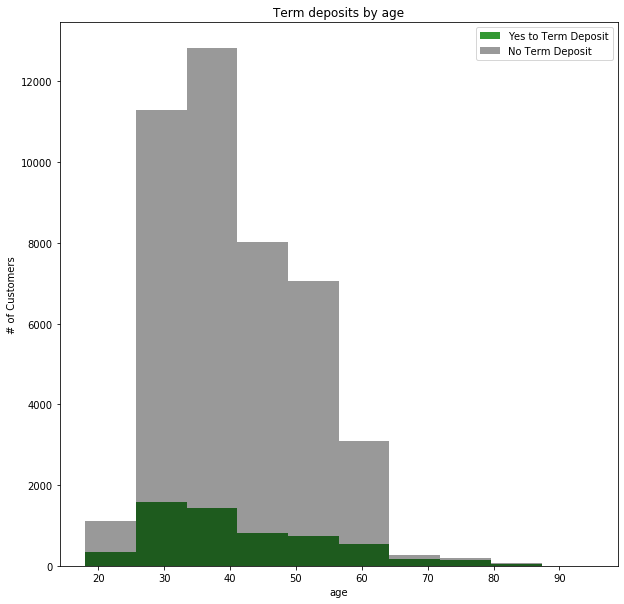

In [139]:
#visually representing age
term_hist('age')
plt.show()

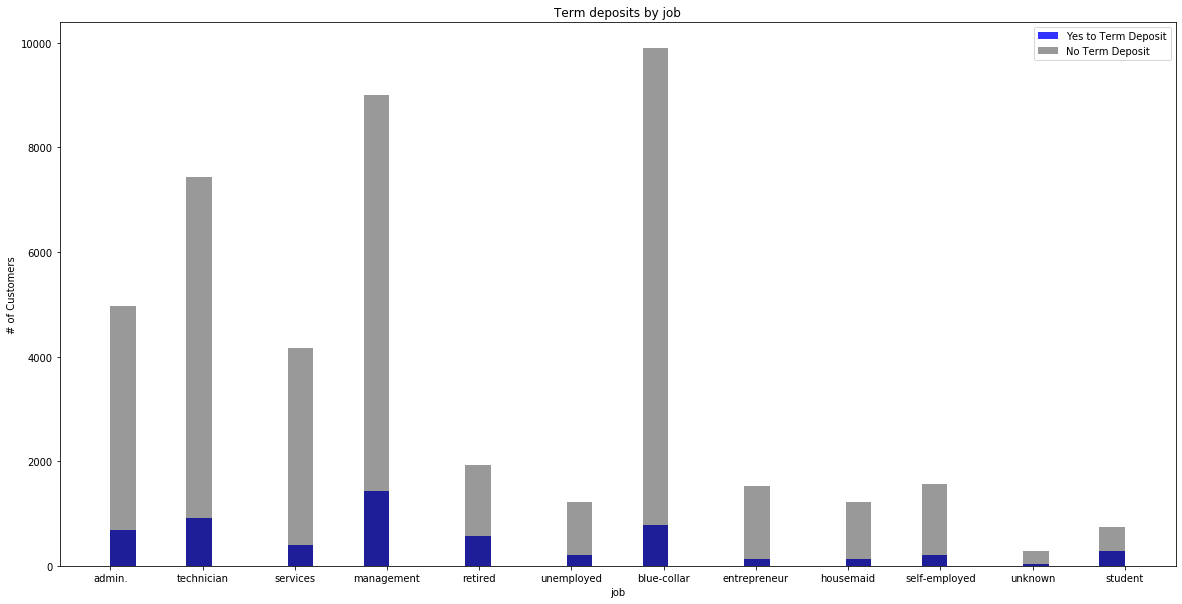

In [140]:
#visualizing jobs
term_hist('job', figx = 20, bins = 40, color1 ='b', color2 = 'k')
plt.show()

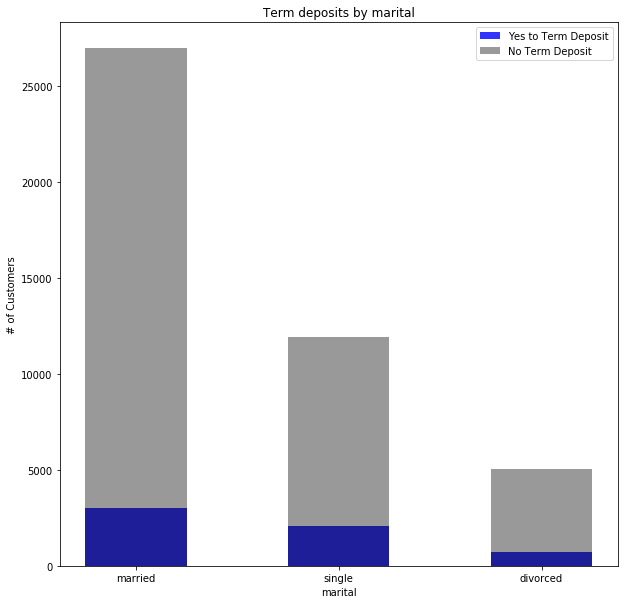

In [141]:
#visualizing marital
term_hist('marital', bins = 5, color1 = 'b', color2 = 'k')
plt.xticks(ticks = [0.2,1,1.8])
plt.show()

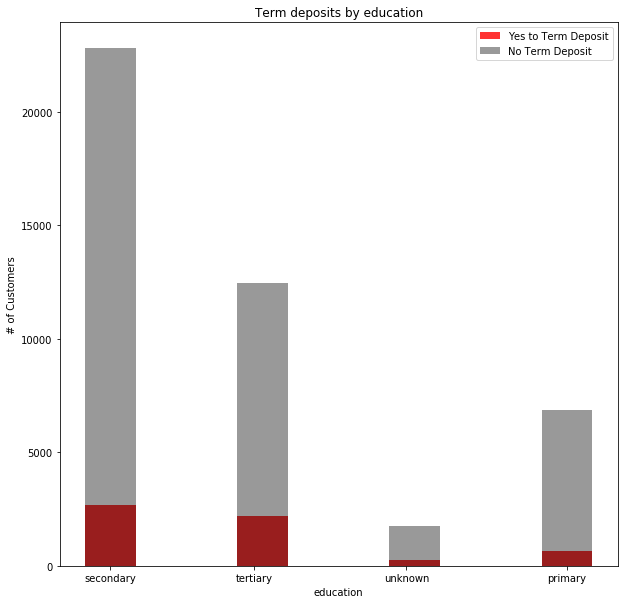

In [142]:
#visualizing education
term_hist('education', color1 = 'r', color2 = 'k')
plt.xticks(ticks = [0.15,1,1.9,2.85])
plt.show()


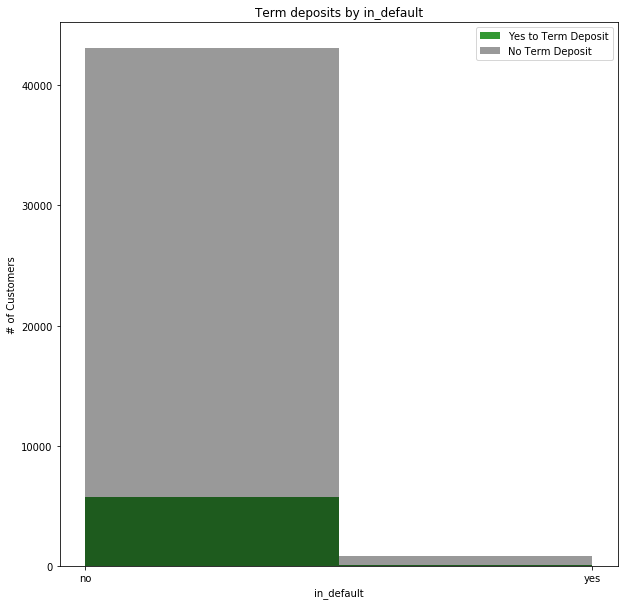

In [143]:
#in_default, doesn't look very useful in this visual form, but that's okay for now. We do see that more people are not in default and also have term_deposits
term_hist('in_default',bins =2, color2 = 'k')

plt.show()

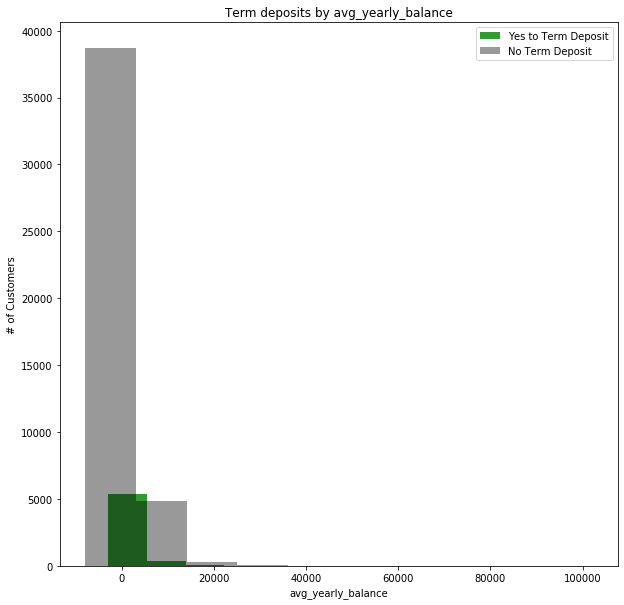

In [144]:
#avg yearlybalance in histogram look. Not pleasing, but it does show that majority of customers have very low balances or negative balances
term_hist('avg_yearly_balance', bins = 10)
plt.show()

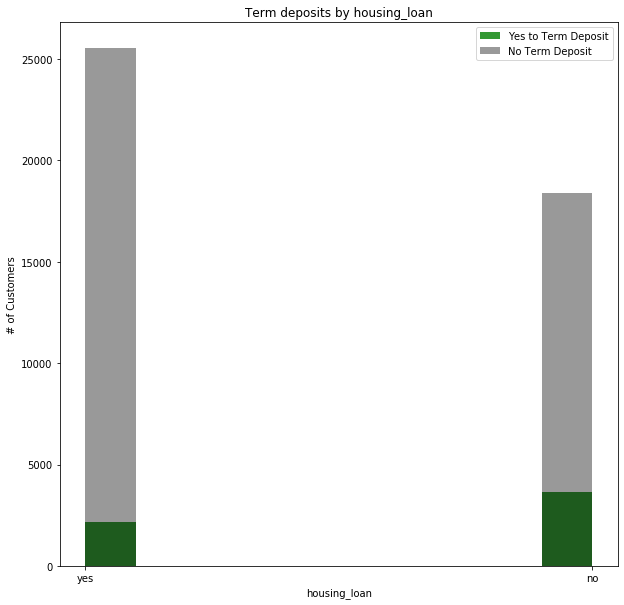

In [145]:
#housing_loan visualized
term_hist('housing_loan')
plt.show()

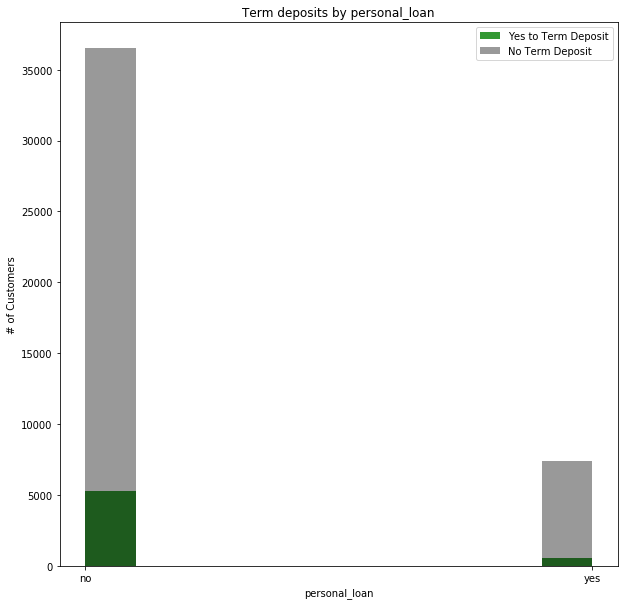

In [146]:
#personal loan
term_hist('personal_loan')
plt.show()

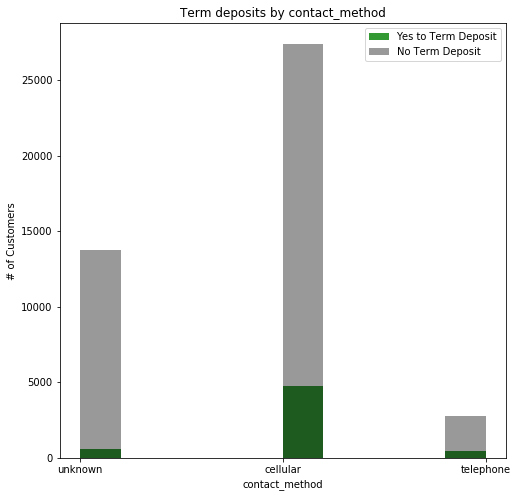

In [155]:
#contact_method during campaign
term_hist('contact_method', figy = 8, figx = 8)
plt.show()

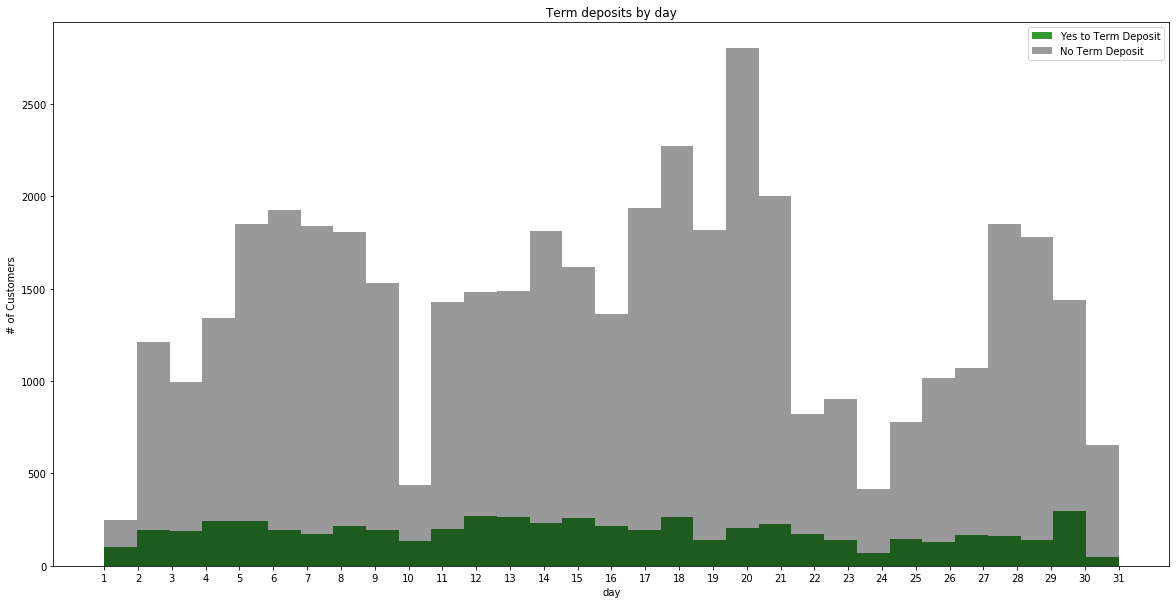

In [157]:
#day of month visualization
term_hist('day', bins = 31, figx = 20)
ticks = range(1,32)
plt.xticks(ticks = ticks)
plt.show()

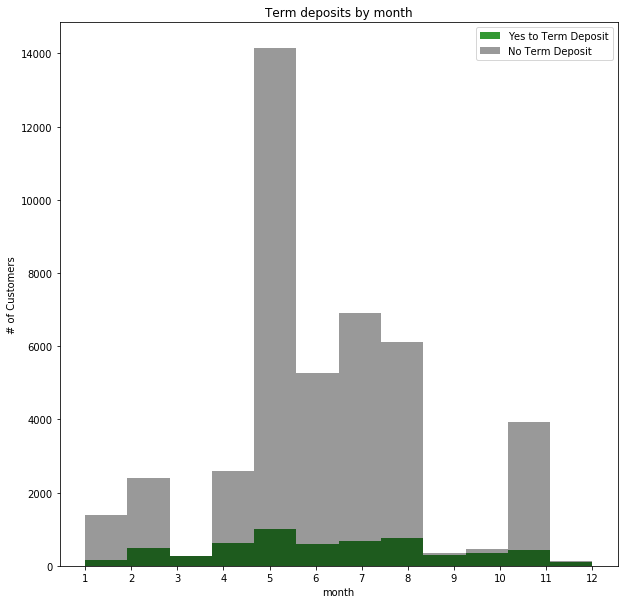

In [160]:
#visualization by month
term_hist('month', bins =12)
ticks = range(1,13)
plt.xticks(ticks = ticks)
plt.show()

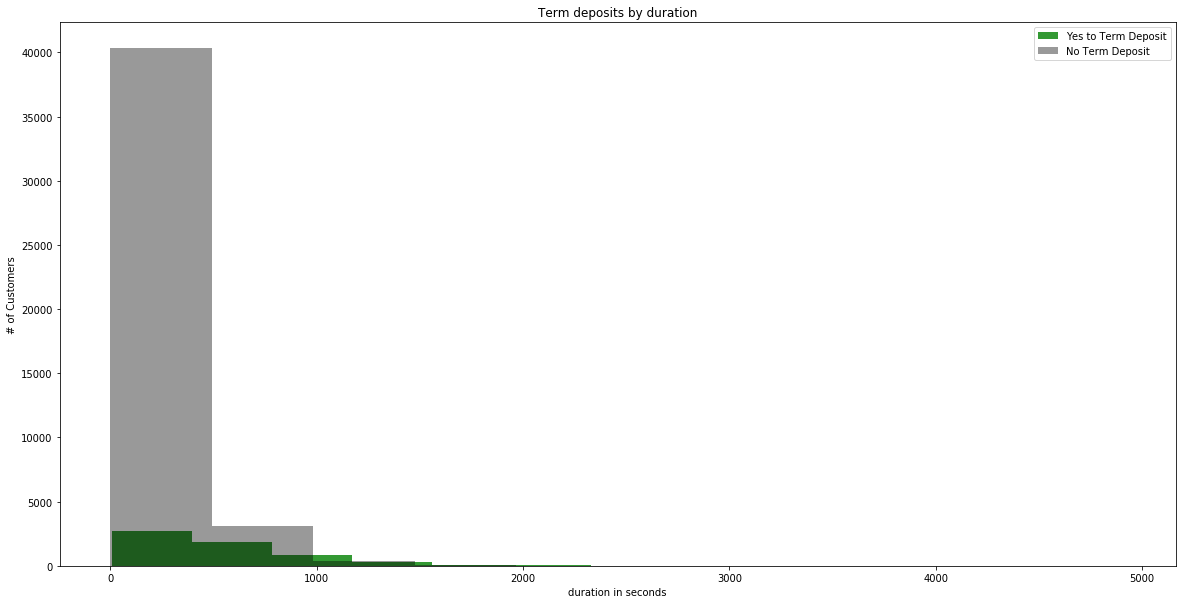

In [173]:
#duration
term_hist('duration', figx = 20)
plt.xlabel('duration in seconds')
plt.show()

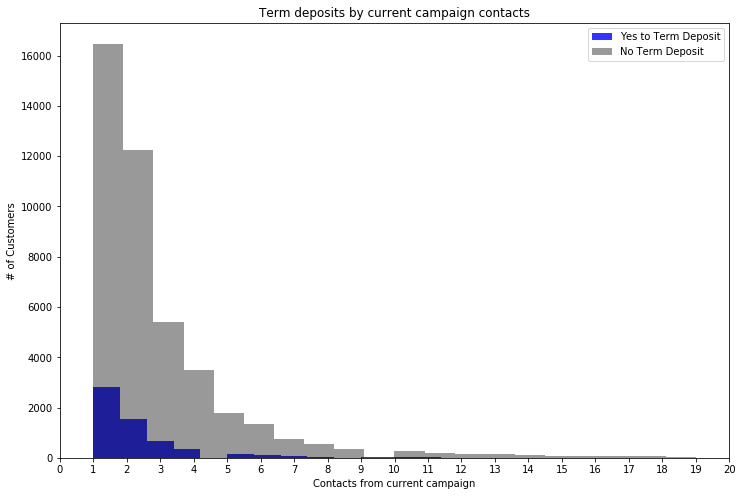

In [202]:
#let's get rid of all of the larger amounts, I should've made room in the function for changing the database, but it's okay

df_temp = df.loc[df['campaign_contacts'] < 20]
plt.figure(figsize=(12,8))
plt.hist(df_temp['campaign_contacts'].loc[df_temp['term_deposit'] == 'yes'], bins = 20, alpha=0.8, label='Yes to Term Deposit', color = 'b')
plt.hist(df_temp['campaign_contacts'].loc[df_temp['term_deposit'] == 'no'], bins = 20, alpha=0.4, label='No Term Deposit', color = 'k')
plt.legend(loc='upper right')
plt.ylabel('# of Customers')
plt.title('Term deposits by current campaign contacts')
plt.xlabel('Contacts from current campaign')
ticks = range(0,21)
plt.xticks(ticks = ticks)
plt.show()

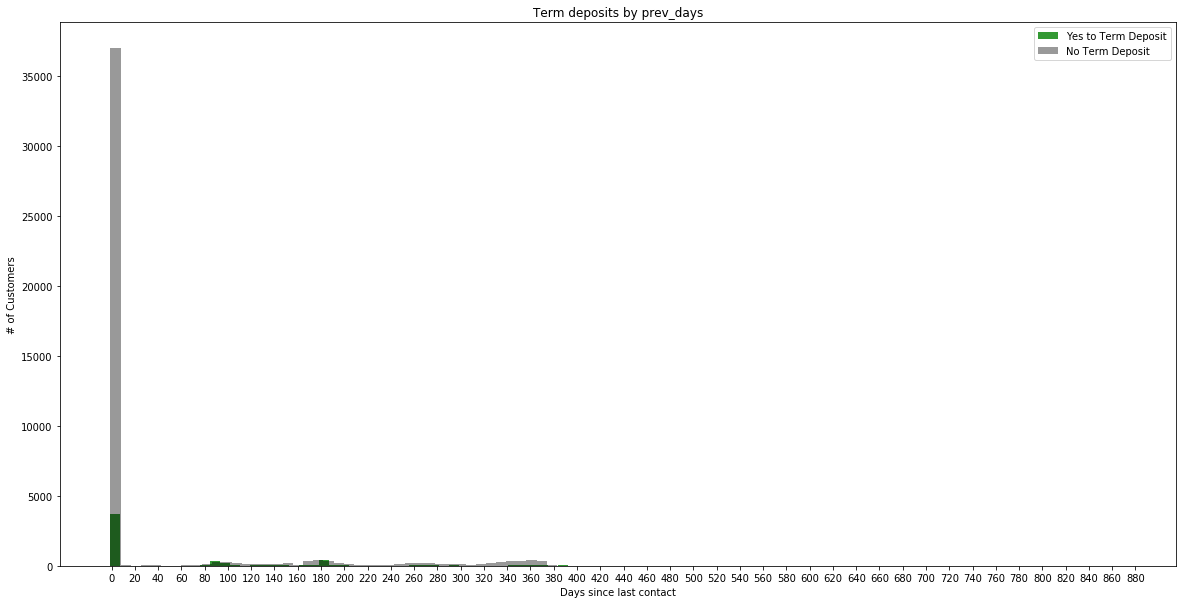

In [181]:
# a bit deceiving as -1 represents never being contacted. I'll rework this and think of something better if I plan to use this visual
term_hist('prev_days', bins = 100,figx = 20)
plt.xlabel('Days since last contact')
ticks=range(0,900,20)
plt.xticks(ticks = ticks)
plt.show()

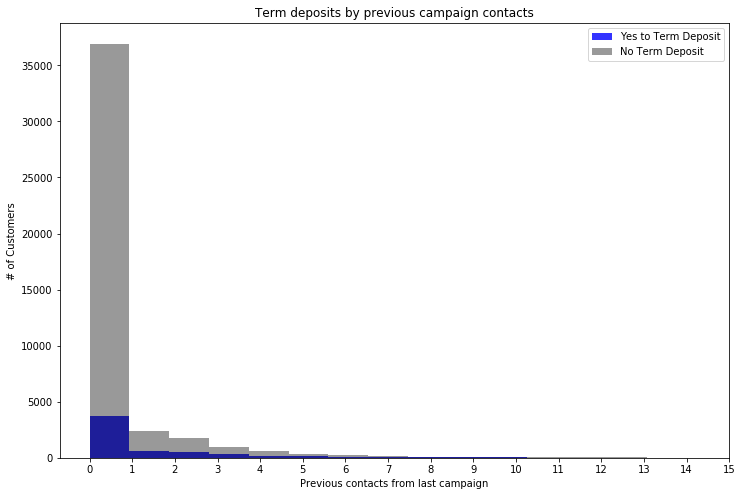

In [200]:
#previous contacts
# so I think I have to get rid of the the big number
df_temp = df.loc[df['previous_contacts'] < 15]
plt.figure(figsize=(12,8))
plt.hist(df_temp['previous_contacts'].loc[df_temp['term_deposit'] == 'yes'], bins = 15, alpha=0.8, label='Yes to Term Deposit', color = 'b')
plt.hist(df_temp['previous_contacts'].loc[df_temp['term_deposit'] == 'no'], bins = 15, alpha=0.4, label='No Term Deposit', color = 'k')
plt.legend(loc='upper right')
plt.ylabel('# of Customers')
plt.title('Term deposits by previous campaign contacts')
plt.xlabel('Previous contacts from last campaign')
ticks = range(0,16)
plt.xticks(ticks = ticks)
plt.show()

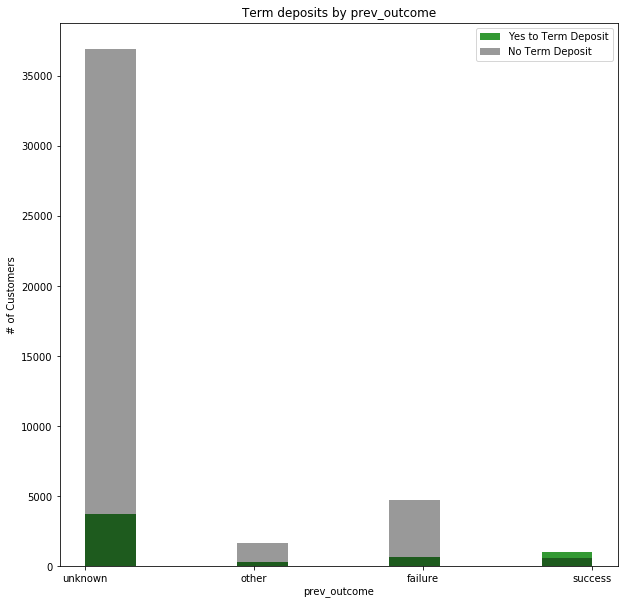

In [204]:
#visualizing previous outcome
term_hist('prev_outcome')
plt.show()

While I'm not entirely happy with the visualizations as they have large factors that are around 0, after doing some more testing I should be able to figure out a better way to visualize the findings especially once the final model is made. We can always revisit the visualization step once I figure out how I want to present the findings and after creating a successful model.

Next is some basic correlations and then we can move into the next step

In [211]:
df_yes = df.loc[df['term_deposit'] == 'yes']
df_yes.corr(method = 'pearson')

,age,avg_yearly_balance,day,month,duration,campaign_contacts,prev_days,previous_contacts
age,1.000000,0.124335,0.002470,0.049235,-0.028516,-0.024583,0.022833,0.030219
avg_yearly_balance,0.124335,1.000000,0.010051,0.038250,-0.042057,-0.000878,0.010880,0.020937
day,0.002470,0.010051,1.000000,0.009152,0.039356,0.084491,-0.026867,-0.040779
month,0.049235,0.038250,0.009152,1.000000,-0.003586,0.011214,0.021744,0.045596
duration,-0.028516,-0.042057,0.039356,-0.003586,1.000000,0.167687,-0.162006,-0.145714
campaign_contacts,-0.024583,-0.000878,0.084491,0.011214,0.167687,1.000000,-0.098127,-0.055911
prev_days,0.022833,0.010880,-0.026867,0.021744,-0.162006,-0.098127,1.000000,0.460791
previous_contacts,0.030219,0.020937,-0.040779,0.045596,-0.145714,-0.055911,0.460791,1.000000


Looks like we have a small age correlation with yearly balance. A small duration correlation with # of campaign contacs. and a very strong correlation of previous_days with previous_contacts, however, this may be because of the large amount of -1s and 0s in there. 